# Polynomial Regression with multiple variables
-----

## Theory

In prior versions of regression anaylsis the input values consist of polynomials of only degree one. In this versions polynomials of higher degrees like $x^3$ or $x^5$ as well as combinations of independent values $x^2v$ can be used as input variables:

$$\begin{eqnarray}
y = x^T\theta &&&& \text{with} && x = \begin{bmatrix} 1 \\ x_1 \\ .. \\ x_{n-1} \end{bmatrix} && \text{and} && \theta = \begin{bmatrix} \theta_0 \\ \theta_1 \\ .. \\ \theta_{n-1} \end{bmatrix}
\tag{1}
\end{eqnarray}$$

$x_1$ can either refer to a single independent variable $x$ or to a combination of multiple ones $vx^2w^3$.

Formulating the cost function and using gradient descent to minimize it can be reused from the "with one variable" [notebook](linear_regression_one_variable.ipynb).

-----

## The Implementation

In [1]:
import numpy as np


def compute_costs(x, y, theta):
    """ Calculates the squared error between ground truth y and predicted output y'

    :param x: input data, feature matrix
    :param y: output data, ground truth
    :param theta: the estimated linear model's parameters
    :return predicted_result: squared error
    """
    m = y.shape[0] # number of samples
    return 1/(2 * m) * sum(np.power(np.matmul(x, theta) - y, 2)) # vectorized form of (2)

def gradient_descent(x, y, theta=None, alpha=0.01, num_iters=100):
    """ Performs gradient descent to determine the best possible model based on given input data (x)
        and output data (y)

    :param x: input data, feature matrix
    :param y: output data, ground truth
    :param theta: initial linear model's parameters
    :param alpha: learning rate
    :param num_iters: number of iterations to run gradient descent
    :return theta: estimated linear model's parameters
    :return costs: list containing the calculated cost for each iteration
    """
    m, n = x.shape
    if theta is None:
        theta = np.random.rand(n, 1)

    costs = []
    for i in range(num_iters):
        theta -= alpha * (1 / m) * np.matmul(np.transpose(x), (np.matmul(x, theta) - y)) # see (7)
        costs.append(compute_costs(x, y, theta))

    return theta, costs

def predict(x, theta):
    """ Predicts outputs based on input values x and estimated theta

    :param x: input data, feature matrix
    :param theta: estimated linear model's parameters
    :return predicted_result: predicted output for given input data
    """
    return np.matmul(x, theta)

## The Data

<IPython.core.display.Javascript object>


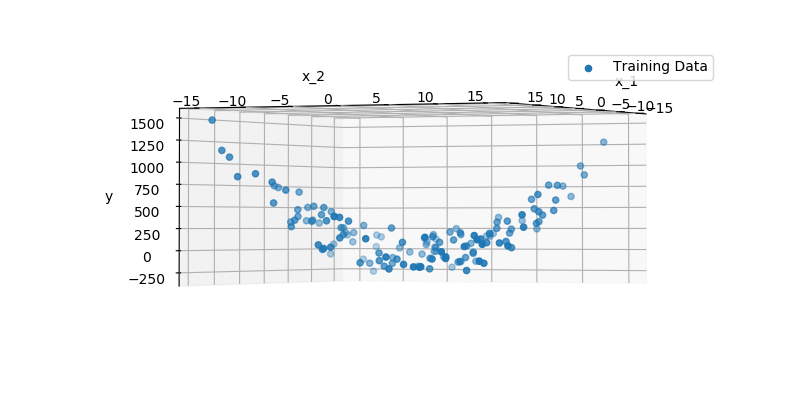

In [2]:
# Generates y values given x (has to be mx5) to demonstrate linear regression analysis with multiple variables
def generate_data(x):
    noise = np.random.random_sample((x.shape[0],)) * 500.0 - 250.0
    # basically y = theta_5 * x^2 + theta_4 * v^2 - theta_3 * x * v + theta_2 * x - theta_1 * v + theta_0 with noise added
    #           x^2            v^2          x*v            x              v
    y = 2.5 * x[:,4] + 0.4 * x[:,3] - 3 * x[:,2] + 0.6 * x[:,1] - 0.2 * x[:,0] + 4 + noise
    y = np.expand_dims(y, axis=1)
    return y

# Generate data
np.random.seed(4)
x = np.random.random_sample((150,2)) * 30 - 15 # v, x
x = np.concatenate((x, np.multiply(np.expand_dims(x[:,1], axis=1), np.expand_dims(x[:,0], axis=1))), axis=1) # x*v
x = np.concatenate((x, np.multiply(np.expand_dims(x[:,0], axis=1), np.expand_dims(x[:,0], axis=1))), axis=1) # v^2
x = np.concatenate((x, np.multiply(np.expand_dims(x[:,1], axis=1), np.expand_dims(x[:,1], axis=1))), axis=1) # x^2
y = generate_data(x)

# Add ones column
x = np.concatenate((x, np.ones((x.shape[0], 1))), axis=1)

# Plot the data
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(8,4))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')
ax.scatter(x[:,0], x[:,1], y)
plt.legend(["Training Data"])
plt.show()

## Regression Analysis

[[ 0.30861162]
 [-0.01692887]
 [-3.04578261]
 [ 0.36009272]
 [ 2.75658934]
 [ 0.29046136]]


<IPython.core.display.Javascript object>


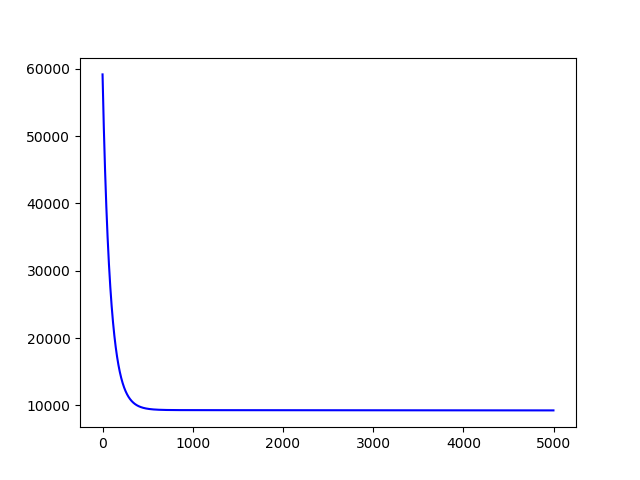

In [3]:
# Execute gradient descent
theta, costs = gradient_descent(x, y, alpha=0.000001, num_iters=5000)
# theta belongs to the input variables in this order: v, x, x*v, v^2, x^2, 1
print(theta)

# Plot the costs during gradient descent
plt.figure(2)
plt.plot(range(len(costs)), costs, "b-")
plt.show()

<IPython.core.display.Javascript object>


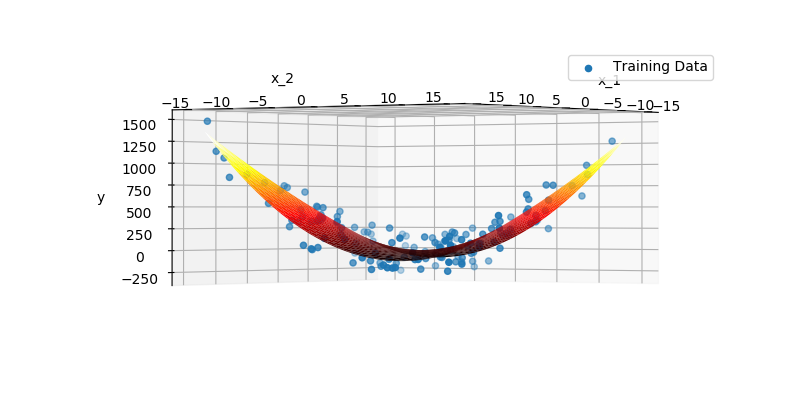

In [4]:
# Plot the training data x, y
fig = plt.figure(3, figsize=(8,4))
ax = fig.gca(projection='3d')

ax.set_xlabel('x_1')
ax.set_ylabel('x_2')
ax.set_zlabel('y')
ax.scatter(x[:,0], x[:,1], y)
plt.legend(["Training Data"])

# and a visualization of the estimated model
from matplotlib import cm
x_1 = np.arange(-15, 15, 0.5)
x_2 = np.arange(-15, 15, 0.5)
x_1, x_2 = np.meshgrid(x_1, x_2)
y_ = theta[0][0] * x_1 + theta[1][0] * x_2 + theta[2][0] * np.multiply(x_1, x_2)  + theta[3][0] * np.multiply(x_1, x_1) + theta[4][0] * np.multiply(x_2, x_2) + theta[5][0]
ax.plot_surface(x_1, x_2, y_, cmap=cm.hot);
plt.show()

The values for $\theta$ are pretty close to the original function's parameters. Overall, it looks like the model fits the data points.